In [122]:
import pandas as pd
import numpy as np
from math import sqrt, log
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures

In [123]:
dtype_dict = {'bathrooms':float, 'waterfront':int, 'sqft_above':int, 
              'sqft_living15':float, 'grade':int, 'yr_renovated':int, 
              'price':float, 'bedrooms':float, 'zipcode':str, 'long':float, 
              'sqft_lot15':float, 'sqft_living':float, 'floors':float, 
              'condition':int, 'lat':float, 'date':str, 'sqft_basement':int, 
              'yr_built':int, 'id':str, 'sqft_lot':int, 'view':int}

sales = pd.read_csv('./data/kc_house_data.csv', dtype=dtype_dict)
sales = sales.sort_values(['sqft_living', 'price'])

In [124]:
l2_small_penalty = 1.5e-5

In [125]:
poly15 = PolynomialFeatures(degree = 15)
poly15_data = poly15.fit_transform(sales[['sqft_living']])

### RIDGE

In [126]:
model = Ridge(alpha = l2_small_penalty, normalize = True)
model.fit(poly15_data, sales['price'])

Ridge(alpha=1.5e-05, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=True, random_state=None, solver='auto', tol=0.001)

In [127]:
model.coef_, model.intercept_

(array([ 0.00000000e+00,  1.24873306e+02, -4.77376011e-02,  3.01446238e-05,
        -2.44419942e-09, -1.94153675e-13,  8.54085686e-18,  1.51142121e-21,
         8.27979094e-26,  6.52603100e-31, -3.27895017e-34, -3.87962315e-38,
        -2.72437650e-42, -1.07790800e-46,  3.78242694e-51,  1.39790296e-54]),
 220664.37505489454)

In [128]:
model.coef_[1]

124.8733064800461

In [129]:
set_1 = pd.read_csv('./data/wk3_kc_house_set_1_data.csv', dtype=dtype_dict)
set_2 = pd.read_csv('./data/wk3_kc_house_set_2_data.csv', dtype=dtype_dict)
set_3 = pd.read_csv('./data/wk3_kc_house_set_3_data.csv', dtype=dtype_dict)
set_4 = pd.read_csv('./data/wk3_kc_house_set_4_data.csv', dtype=dtype_dict)

In [130]:
set_1.shape, set_2.shape, set_3.shape, set_4.shape

((5404, 21), (5398, 21), (5409, 21), (5402, 21))

In [131]:
def poly15_models(sales):
    l2_small_penalty = 1e-9
    
    poly15 = PolynomialFeatures(degree = 15)
    poly15_data = poly15.fit_transform(sales[['sqft_living']])
    
    poly15_r = Ridge(alpha = l2_small_penalty, normalize = True).fit(poly15_data, sales['price'])
    print("Coefficients: {}".format(poly15_r.coef_))
    print("Intercept: {}".format(poly15_r.intercept_))
    
    plt.plot(poly15_data[:, 1], sales['price'],'.',
        poly15_data[:, 1], poly15_r.predict(poly15_data),'-')
    
    plt.show()
    plt.clf()

Coefficients: [ 0.00000000e+00  5.44669386e+02 -3.55447593e-01  1.22446376e-04
 -1.17175302e-08 -3.90512590e-13 -1.39076078e-17  1.47860247e-20
  6.87492292e-25 -7.57203882e-29 -1.04097323e-32 -3.71844307e-37
  3.39989360e-41  5.56592104e-45  2.53761428e-49 -3.35152958e-53]
Intercept: 23888.829963321798


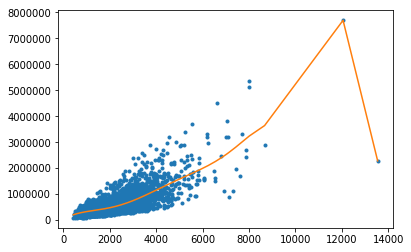

<Figure size 432x288 with 0 Axes>

In [132]:
poly15_models(set_1)

Coefficients: [ 0.00000000e+00  8.59362772e+02 -8.18118432e-01  4.28880073e-04
 -9.12770880e-08 -2.69604526e-12  3.73980477e-15 -1.42712195e-19
 -6.30794644e-23 -1.44559364e-27  7.44321388e-31  9.25865568e-35
  3.28000393e-41 -1.29543484e-42 -1.38781245e-46  1.66546431e-50]
Intercept: -55614.67652170104


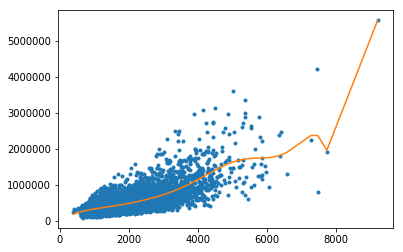

<Figure size 432x288 with 0 Axes>

In [133]:
poly15_models(set_2)

Coefficients: [ 0.00000000e+00 -7.55395966e+02  9.75579554e-01 -4.58946022e-04
  7.77958203e-08  7.15013159e-12 -2.88601964e-15 -2.13678057e-20
  3.38085254e-23  2.19178133e-27 -1.97067824e-31 -4.15992970e-35
 -1.80196322e-39  3.19071164e-43  5.08456945e-47 -3.93304268e-51]
Intercept: 470987.8732264717


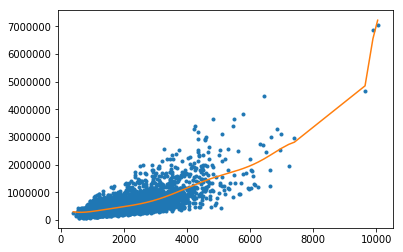

<Figure size 432x288 with 0 Axes>

In [134]:
poly15_models(set_3)

Coefficients: [ 0.00000000e+00  1.11944572e+03 -9.83760248e-01  3.38770946e-04
  3.60376914e-08 -4.37813940e-11  5.77191685e-15  7.66794835e-19
 -9.49297121e-23 -1.96030772e-26 -2.10892409e-32  3.31005012e-34
  3.47734025e-38 -2.43039154e-42 -8.79553558e-46  6.44569800e-50]
Intercept: -145655.6166632648


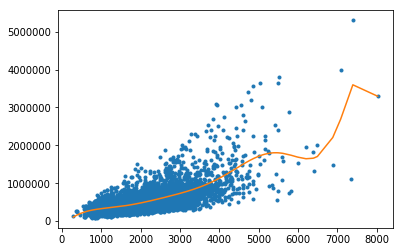

<Figure size 432x288 with 0 Axes>

In [135]:
poly15_models(set_4)

smallest (power_1): -7.55395966e+02, set_3
largest (power_1): 1.11944572e+03, set_4

In [136]:
train_valid_shuffled = pd.read_csv('./data/wk3_kc_house_train_valid_shuffled.csv', dtype=dtype_dict)
test = pd.read_csv('./data/wk3_kc_house_test_data.csv', dtype=dtype_dict)

In [137]:
def k_fold_cross_validation(k, l2_penalty, data_mat):
    total_error = 0
    n = len(data_mat)
    
    for i in range(k):
        start = (n*i)//k
        end = (n*(i+1))//k-1
        
        validation = data_mat[start:end+1, :]
        train = np.vstack((data_mat[0:start, :], data_mat[end+1:n, :]))

        model = Ridge(alpha = l2_penalty, normalize = True).fit(train[:,:-1], train[:,-1])
                
        residuals = validation[:, -1] - model.predict(validation[:,:-1])
        total_error += (residuals * residuals).sum()
        
    return total_error/n

In [138]:
import numpy as np
type(np.logspace(1, 7, num=13)[2].item())

float

In [139]:
poly15 = PolynomialFeatures(degree = 15)
poly15_data = poly15.fit_transform(train_valid_shuffled[['sqft_living']])
data_mat = np.hstack((poly15_data, train_valid_shuffled['price'].values.reshape(-1, 1)))

In [140]:
penalties = np.logspace(1, 7, num = 13)
penalties

array([1.00000000e+01, 3.16227766e+01, 1.00000000e+02, 3.16227766e+02,
       1.00000000e+03, 3.16227766e+03, 1.00000000e+04, 3.16227766e+04,
       1.00000000e+05, 3.16227766e+05, 1.00000000e+06, 3.16227766e+06,
       1.00000000e+07])

In [141]:
folds = 10
average_validation_rss = list()

for penalty in penalties:
    average_validation_rss.append(k_fold_cross_validation(folds, penalty, data_mat))
average_validation_rss

[115328328885.48781,
 127059335781.64384,
 132707483065.96605,
 135525819079.20337,
 136614436500.81252,
 136983365569.3536,
 137102685583.2211,
 137140689579.98692,
 137152734870.06625,
 137156546668.75876,
 137157752339.8989,
 137158133634.05208,
 137158254212.59666]

In [142]:
best_penalty_rss = sorted(zip(penalties, average_validation_rss), key = lambda x: x[1])[0]

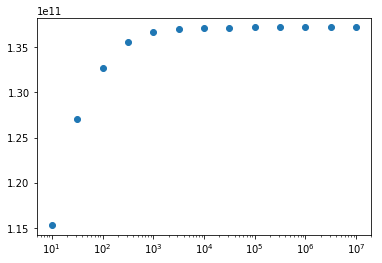

In [143]:
plt.plot(penalties, average_validation_rss, 'o')
plt.xscale('log')

In [144]:
penalty = best_penalty_rss[0]
penalty

10.0

In [145]:
model_train = Ridge(alpha = penalty, normalize = True).fit(data_mat[:,:-1], data_mat[:,-1])

In [146]:
model_train.coef_, model_train.intercept_

(array([ 0.00000000e+00,  2.19743689e+01,  3.74232632e-03,  4.39535849e-07,
         2.88188879e-11,  1.39445522e-15,  6.21936915e-20,  2.68144984e-24,
         1.06798106e-28,  3.28628828e-33, -1.90695891e-39, -1.37034425e-41,
        -1.78842251e-45, -1.77613529e-49, -1.58381866e-53, -1.33471666e-57]),
 465262.67268124176)

In [147]:
poly15_test = PolynomialFeatures(degree = 15)
poly15_test_data = poly15_test.fit_transform(test[['sqft_living']])
poly15_test_data[:2,:]

array([[1.00000000e+00, 1.89000000e+03, 3.57210000e+06, 6.75126900e+09,
        1.27598984e+13, 2.41162080e+16, 4.55796331e+19, 8.61455066e+22,
        1.62815007e+26, 3.07720364e+29, 5.81591488e+32, 1.09920791e+36,
        2.07750295e+39, 3.92648058e+42, 7.42104830e+45, 1.40257813e+49],
       [1.00000000e+00, 1.81000000e+03, 3.27610000e+06, 5.92974100e+09,
        1.07328312e+13, 1.94264245e+16, 3.51618283e+19, 6.36429093e+22,
        1.15193666e+26, 2.08500535e+29, 3.77385968e+32, 6.83068603e+35,
        1.23635417e+39, 2.23780105e+42, 4.05041990e+45, 7.33126002e+48]])

In [148]:
residuals = test['price'] - model_train.predict(poly15_test_data)
rss_test = (residuals * residuals).sum()
rss_test

229953745232505.5

In [149]:
sales.shape

(21613, 21)

In [150]:
training = pd.read_csv("./data/kc_house_train_data.csv", dtype = dtype_dict)
testing = pd.read_csv("./data/kc_house_test_data.csv", dtype = dtype_dict)

X_train = training[training.columns.difference(['price'])]
y_train = training[['price']]

X_test = testing[testing.columns.difference(['price'])]
y_test = testing[['price']]

In [151]:
def predict_output(feature_matrix, weights):
    predictions = np.dot(feature_matrix, weights)
    return(predictions)

In [152]:
def feature_derivative_ridge(errors, feature, weight, l2_penalty, feature_is_constant):
    # If feature_is_constant is True, derivative is twice the dot product of errors and feature
    if feature_is_constant:
        derivative = 2*(np.dot(errors, feature))
    # Otherwise, derivative is twice the dot product plus 2*l2_penalty*weight
    else:
        derivative = 2*(np.dot(errors, feature)+ l2_penalty*weight)
    return derivative

In [153]:
def ridge_regression_gradient_descent(feature_matrix, output, initial_weights, step_size, l2_penalty, max_iterations=100):    
    weights = np.array(initial_weights) # make sure it's a numpy array
    iteration = 0 # iteration counter
    
    #while not reached maximum number of iterations:
    while iteration < max_iterations:
        predictions = predict_output(feature_matrix, weights) 

        errors = predictions - output # prediction errors
               
        for i in range(len(weights)): # loop over each weight
            if i == 0:
                derivative = feature_derivative_ridge(errors, feature_matrix[:, i], weights[i], l2_penalty, True)
            else:
                derivative = feature_derivative_ridge(errors, feature_matrix[:, i], weights[i], l2_penalty, False)

            weights[i] = weights[i] - step_size * derivative
            
        iteration += 1  # increment iteration counter
    return weights

In [154]:
simple_features = ['sqft_living']
my_output = 'price'

In [155]:
#https://stackoverflow.com/questions/8486294/how-to-add-an-extra-column-to-a-numpy-array
simple_feature_matrix = np.c_[np.ones(X_train.shape[0]), X_train[simple_features]] 
output = y_train[my_output].values

simple_test_feature_matrix = np.c_[np.ones(X_test.shape[0]), X_test[simple_features]] 
test_output = y_test[my_output].values

simple_test_feature_matrix.shape, test_output.shape

((4229, 2), (4229,))

In [156]:
initial_weights = np.array([0., 0.])
step_size = 1e-12
max_iterations=1000

In [157]:
initial_weights.shape

(2,)

In [158]:
l2_penalty = 0.0
simple_weights_0_penalty = ridge_regression_gradient_descent(simple_feature_matrix, output, initial_weights, step_size, l2_penalty, max_iterations)

In [159]:
simple_weights_0_penalty

array([-1.63113515e-01,  2.63024369e+02])

In [160]:
l2_penalty = 1e11
simple_weights_high_penalty = ridge_regression_gradient_descent(simple_feature_matrix, output, 
                                                                initial_weights, step_size, l2_penalty, max_iterations)

In [161]:
simple_weights_high_penalty

array([  9.76730382, 124.57217567])

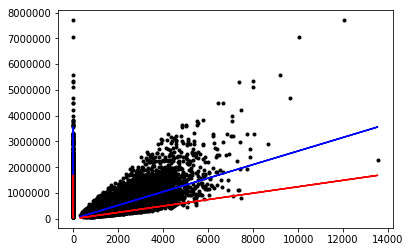

In [162]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(simple_feature_matrix,output,'k.',
         simple_feature_matrix,predict_output(simple_feature_matrix, simple_weights_0_penalty),'b-',
        simple_feature_matrix,predict_output(simple_feature_matrix, simple_weights_high_penalty),'r-')

In [163]:
def calc_rss(feature_matrix, output, weights):
    predictions = predict_output(feature_matrix, weights)
    residuals = predictions - output
    rss_test = (residuals * residuals).sum()
    return rss_test

In [164]:
weights = [0.0, 0.0]
rss_zerowgt =  calc_rss(simple_test_feature_matrix, test_output, weights) 

weights = simple_weights_0_penalty
rss_0penalty =  calc_rss(simple_test_feature_matrix, test_output, weights) 

weights = simple_weights_high_penalty
rss_highpenalty = calc_rss(simple_test_feature_matrix, test_output, weights) 

In [165]:
print("no regularization: {:1f}".format(simple_weights_0_penalty[1]))
print("high regularization: {:1f}".format(simple_weights_high_penalty[1]))

no regularization: 263.024369
high regularization: 124.572176


In [166]:
print("rss zero initial weights: {:.2e}".format(rss_zerowgt))
print("rss weights (no regularization): {:.2e}".format(rss_0penalty))
print("rss weights (high regularization): {:.2e}".format(rss_highpenalty))

rss zero initial weights: 1.78e+15
rss weights (no regularization): 2.76e+14
rss weights (high regularization): 6.95e+14


In [167]:
model_features = ['sqft_living', 'sqft_living15']
my_output = 'price'

In [168]:
feature_matrix = np.c_[np.ones(X_train.shape[0]), X_train[model_features]] 
output = y_train[my_output].values

test_feature_matrix = np.c_[np.ones(X_test.shape[0]), X_test[model_features]] 
test_output = y_test[my_output].values

feature_matrix.shape, output.shape, test_feature_matrix.shape, test_output.shape

((17384, 3), (17384,), (4229, 3), (4229,))

In [169]:
initial_weights = np.array([0.0,0.0,0.0])
step_size = 1e-12
max_iterations = 1000

In [170]:
l2_penalty = 0.0
multiple_weights_0_penalty = ridge_regression_gradient_descent(feature_matrix, output, 
                                                                initial_weights, step_size, l2_penalty, max_iterations)
multiple_weights_0_penalty

array([ -0.35743483, 243.05416982,  22.41481497])

In [171]:
l2_penalty = 1e11
multiple_weights_high_penalty = ridge_regression_gradient_descent(feature_matrix, output, 
                                                                initial_weights, step_size, l2_penalty, max_iterations)

In [172]:
weights = np.array([0.0, 0.0, 0.0])
rss_zerowgt =  calc_rss(test_feature_matrix, test_output, weights) 

weights = multiple_weights_0_penalty
rss_0penalty =  calc_rss(test_feature_matrix, test_output, weights) 

weights = multiple_weights_high_penalty
rss_highpenalty = calc_rss(test_feature_matrix, test_output, weights) 

In [173]:
print("rss zero initial weights: {:.2e}".format(rss_zerowgt))
print("rss weights (no regularization): {:.2e}".format(rss_0penalty))
print("rss weights (high regularization): {:.2e}".format(rss_highpenalty))

rss zero initial weights: 1.78e+15
rss weights (no regularization): 2.74e+14
rss weights (high regularization): 5.00e+14


In [174]:
np.dot(test_feature_matrix[:1, :], multiple_weights_0_penalty), test_output[0]

(array([387465.47605824]), 310000.0)

In [175]:
np.dot(test_feature_matrix[:1, :], multiple_weights_0_penalty) - test_output[0]

array([77465.47605824])

In [176]:
np.dot(test_feature_matrix[:1, :], multiple_weights_high_penalty), test_output[0]

(array([270453.53032194]), 310000.0)

In [177]:
np.dot(test_feature_matrix[:1, :], multiple_weights_high_penalty) - test_output[0]

array([-39546.46967806])

High regularization model is better. It underpredicts by a smaller amount compared to the no-regularization model
which overpredicts by almost twice as much.

In [178]:
round(multiple_weights_0_penalty[1], 1), round(multiple_weights_high_penalty[1], 1)

(243.1, 91.5)

### LASSO

In [179]:
sales['sqft_living_sqrt'] = sales['sqft_living'].apply(sqrt)
sales['sqft_lot_sqrt'] = sales['sqft_lot'].apply(sqrt)
sales['bedrooms_square'] = sales['bedrooms']*sales['bedrooms']

# In the dataset, 'floors' was defined with type string, 
# so we'll convert them to float, before creating a new feature.
sales['floors'] = sales['floors'].astype(float) 
sales['floors_square'] = sales['floors']*sales['floors']

In [180]:
sales.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'sqft_living_sqrt',
       'sqft_lot_sqrt', 'bedrooms_square', 'floors_square'],
      dtype='object')

In [181]:
all_features = ['bedrooms', 'bedrooms_square', 'bathrooms', 'sqft_living', 'sqft_living_sqrt',
                'sqft_lot', 'sqft_lot_sqrt', 'floors', 'floors_square', 'waterfront', 'view', 
                'condition', 'grade', 'sqft_above','sqft_basement', 'yr_built', 'yr_renovated']

In [193]:
# Fit Lasso 
model_all = Lasso(alpha=5e2, normalize=True)
model_all.fit(sales[all_features], sales['price'])
print(list(zip(model_all.coef_, all_features)))

[(0.0, 'bedrooms'), (0.0, 'bedrooms_square'), (0.0, 'bathrooms'), (134.43931395540557, 'sqft_living'), (0.0, 'sqft_living_sqrt'), (0.0, 'sqft_lot'), (0.0, 'sqft_lot_sqrt'), (0.0, 'floors'), (0.0, 'floors_square'), (0.0, 'waterfront'), (24750.00458561002, 'view'), (0.0, 'condition'), (61749.10309071687, 'grade'), (0.0, 'sqft_above'), (0.0, 'sqft_basement'), (-0.0, 'yr_built'), (0.0, 'yr_renovated')]


In [194]:
model_all.coef_, model_all.intercept_

(array([    0.        ,     0.        ,     0.        ,   134.43931396,
            0.        ,     0.        ,     0.        ,     0.        ,
            0.        ,     0.        , 24750.00458561,     0.        ,
        61749.10309072,     0.        ,     0.        ,    -0.        ,
            0.        ]), -218136.2140351897)

In [200]:
# features assigned non-zero weights
[(c, f) for c, f in list(zip(model_all.coef_, all_features)) if c > 0.0]

[(134.43931395540557, 'sqft_living'),
 (24750.00458561002, 'view'),
 (61749.10309071687, 'grade')]

In [202]:
testing = pd.read_csv('./data/wk3_kc_house_test_data.csv', dtype=dtype_dict)
training = pd.read_csv('./data/wk3_kc_house_train_data.csv', dtype=dtype_dict)
validation = pd.read_csv('./data/wk3_kc_house_valid_data.csv', dtype=dtype_dict)

In [203]:
testing['sqft_living_sqrt'] = testing['sqft_living'].apply(sqrt)
testing['sqft_lot_sqrt'] = testing['sqft_lot'].apply(sqrt)
testing['bedrooms_square'] = testing['bedrooms']*testing['bedrooms']
testing['floors_square'] = testing['floors']*testing['floors']

training['sqft_living_sqrt'] = training['sqft_living'].apply(sqrt)
training['sqft_lot_sqrt'] = training['sqft_lot'].apply(sqrt)
training['bedrooms_square'] = training['bedrooms']*training['bedrooms']
training['floors_square'] = training['floors']*training['floors']

validation['sqft_living_sqrt'] = validation['sqft_living'].apply(sqrt)
validation['sqft_lot_sqrt'] = validation['sqft_lot'].apply(sqrt)
validation['bedrooms_square'] = validation['bedrooms']*validation['bedrooms']
validation['floors_square'] = validation['floors']*validation['floors']

In [204]:
penalties = np.logspace(1, 7, num=13)

In [206]:
rss_validation = list()

for penalty in penalties:
    model_all = Lasso(alpha = penalty, normalize=True).fit(training[all_features], training['price'])
    residuals_validation = validation['price'] - model_all.predict(validation[all_features])
    rss_validation.append((residuals_validation * residuals_validation).sum())

In [207]:
rss_validation

[398213327300134.94,
 399041900253346.8,
 429791604072559.6,
 463739831045121.1,
 645898733633800.6,
 1222506859427163.0,
 1222506859427163.0,
 1222506859427163.0,
 1222506859427163.0,
 1222506859427163.0,
 1222506859427163.0,
 1222506859427163.0,
 1222506859427163.0]

In [216]:
# best value for the l1_penalty
best_penalty = sorted(list(zip(penalties, rss_validation)), key = lambda x: x[1])[0][0]
best_penalty

10.0

In [220]:
# fit model with best penalty on test set
model_best = Lasso(alpha = best_penalty, normalize=True).fit(training[all_features], training['price'])
resids_test = testing['price'] - model_best.predict(testing[all_features])
rss_test = (resids_test * resids_test).sum()
print("rss (test) using l1_penalty = 10: {:.2e}".format(rss_test))

rss (test) using l1_penalty = 10: 9.85e+13


In [223]:
# number of non-zero coeffs 
np.count_nonzero(model_best.coef_) + np.count_nonzero(model_best.intercept_)

15

In [225]:
model_best.coef_, model_best.intercept_

(array([-1.61445628e+04,  3.73245384e+02,  5.08412433e+04,  6.17853560e+02,
        -4.44113549e+04,  7.85623065e-01, -7.01194765e+02, -0.00000000e+00,
         5.01420046e+03,  6.19488752e+05,  3.80418557e+04,  2.49987718e+04,
         1.28716235e+05,  0.00000000e+00,  0.00000000e+00, -3.29383118e+03,
         1.00573209e+01]), 6630155.668628361)

In [249]:
max_nonzeros = 7

In [250]:
penalties = np.logspace(1, 4, num=20)
penalties

array([   10.        ,    14.38449888,    20.69138081,    29.76351442,
          42.81332399,    61.58482111,    88.58667904,   127.42749857,
         183.29807108,   263.66508987,   379.26901907,   545.55947812,
         784.75997035,  1128.83789168,  1623.77673919,  2335.72146909,
        3359.81828628,  4832.93023857,  6951.92796178, 10000.        ])

In [251]:
non_zero = list()
for l1_penalty in penalties:
    model = Lasso(alpha = l1_penalty, normalize=True).fit(training[all_features], training['price'])
    non_zero.append((l1_penalty, np.count_nonzero(model.coef_) + np.count_nonzero(model.intercept_)))

In [252]:
non_zero

[(10.0, 15),
 (14.38449888287663, 15),
 (20.6913808111479, 15),
 (29.76351441631318, 15),
 (42.81332398719393, 13),
 (61.58482110660264, 12),
 (88.58667904100822, 11),
 (127.42749857031335, 10),
 (183.29807108324357, 7),
 (263.6650898730358, 6),
 (379.26901907322497, 6),
 (545.5594781168514, 6),
 (784.7599703514607, 5),
 (1128.8378916846884, 3),
 (1623.776739188721, 3),
 (2335.7214690901214, 2),
 (3359.818286283781, 1),
 (4832.930238571752, 1),
 (6951.927961775606, 1),
 (10000.0, 1)]

In [253]:
for p, z in non_zero:
    if z > max_nonzeros:
        l1_penalty_min = p
    elif z < max_nonzeros:
        l1_penalty_max = p
        break;
print(l1_penalty_min)
print(l1_penalty_max)

127.42749857031335
263.6650898730358


In [254]:
l1_penalty_values = np.linspace(l1_penalty_min, l1_penalty_max, 20)
l1_penalty_values

array([127.42749857, 134.59789811, 141.76829765, 148.9386972 ,
       156.10909674, 163.27949628, 170.44989582, 177.62029537,
       184.79069491, 191.96109445, 199.13149399, 206.30189354,
       213.47229308, 220.64269262, 227.81309216, 234.9834917 ,
       242.15389125, 249.32429079, 256.49469033, 263.66508987])

In [256]:
rss_validation = list()

for l1_penalty in l1_penalty_values:    
    model_all = Lasso(alpha = l1_penalty, normalize=True).fit(training[all_features], training['price'])
    
    num_nz = np.count_nonzero(model_all.coef_) + np.count_nonzero(model_all.intercept_)
    residuals_validation = validation['price'] - model_all.predict(validation[all_features])
    rss_validation.append(((residuals_validation * residuals_validation).sum(), l1_penalty, num_nz))

In [257]:
rss_validation

[(435374677102680.7, 127.42749857031335, 10),
 (437009229124471.3, 134.5978981125619, 10),
 (438236128386912.1, 141.76829765481045, 8),
 (439158937799660.0, 148.938697197059, 8),
 (440037365263316.56, 156.10909673930755, 7),
 (440777489641605.2, 163.2794962815561, 7),
 (441566698090139.94, 170.44989582380464, 7),
 (442406413188666.25, 177.6202953660532, 7),
 (443296716874315.0, 184.79069490830176, 7),
 (444239780526141.6, 191.96109445055032, 7),
 (445230739842614.2, 199.13149399279888, 7),
 (446268896864706.4, 206.3018935350474, 6),
 (447112919434640.6, 213.47229307729594, 6),
 (447998187851564.94, 220.6426926195445, 6),
 (448924706673255.06, 227.81309216179307, 6),
 (449892475899711.06, 234.98349170404163, 6),
 (450901498778123.25, 242.1538912462902, 6),
 (451952426654987.06, 249.32429078853872, 6),
 (453043924367599.3, 256.49469033078725, 6),
 (454176669662635.25, 263.6650898730358, 6)]

In [259]:
x = []
[x.append((r, p)) for r, p, z in rss_validation if z == 7]
x

[(440037365263316.56, 156.10909673930755),
 (440777489641605.2, 163.2794962815561),
 (441566698090139.94, 170.44989582380464),
 (442406413188666.25, 177.6202953660532),
 (443296716874315.0, 184.79069490830176),
 (444239780526141.6, 191.96109445055032),
 (445230739842614.2, 199.13149399279888)]

In [260]:
sorted(x, key = lambda y: y[0])[0]

(440037365263316.56, 156.10909673930755)

In [265]:
selected_penalty = sorted(x, key = lambda y: y[0])[0][1]
model_best = Lasso(alpha = selected_penalty, normalize=True).fit(training[all_features], training['price'])
list(zip(all_features, model_best.coef_)), model_best.intercept_

([('bedrooms', -0.0),
  ('bedrooms_square', -0.0),
  ('bathrooms', 10610.890284398312),
  ('sqft_living', 163.38025164762888),
  ('sqft_living_sqrt', 0.0),
  ('sqft_lot', -0.0),
  ('sqft_lot_sqrt', -0.0),
  ('floors', 0.0),
  ('floors_square', 0.0),
  ('waterfront', 506451.68711484916),
  ('view', 41960.04355485288),
  ('condition', 0.0),
  ('grade', 116253.5536997075),
  ('sqft_above', 0.0),
  ('sqft_basement', 0.0),
  ('yr_built', -2612.2348803574873),
  ('yr_renovated', 0.0)],
 4422190.27912035)

In [262]:
np.count_nonzero(model_best.coef_)

6